In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

## Cellular Automata

In [31]:
# Step evolution

def ca_evaluate(rule, state):
    
    binary_rule=[int(x) for x in np.binary_repr(rule, width=8)] #binarizing the rule
     
    pattern=np.zeros([8,3]) #pattern 111, 110, 100, ..., 000
    for i in range(8):
        pattern[i,:]=[int(x) for x in np.binary_repr(7-i, width=3)]
    
    evolved_state = np.zeros(len(state))
            
    for j in range(len(state)):
        if j==len(state)-1:
            for k in range(len(pattern)):
                if np.array_equal(pattern[k, :], [state[len(state)-2],state[len(state)-1],state[0]]):
                    evolved_state[j] = binary_rule[k]
        else:
            for k in range(len(pattern)):
                if np.array_equal(pattern[k, :], [state[j-1],state[j],state[j+1]]):
                    evolved_state[j] = binary_rule[k]
    return evolved_state

In [32]:
# Generation evolution

def ca(rule, initial_state, generations):
    
    grid = np.zeros([generations, len(initial_state)])
    grid[0] = initial_state
    
    for i in range(generations-1):
        grid[i+1] = ca_evaluate(rule, grid[i])
    
    return grid

# Setting the data

 ## Rule: 18
 ## States with 11 sites

In [4]:
sites = 11

x = []
for i in range(2**sites):
    x.append([float(j) for j in np.binary_repr(2**sites -1 - i, width=sites)])

In [5]:
x = random.sample(x, len(x))

In [6]:
rule = 18
y = []
for i in range(len(x)):
    y.append(ca_evaluate(rule, x[i]).tolist())

# Training 

In [7]:
#Keras Model

In [8]:
model = Sequential()

In [9]:
n_hidden = 1024
model.add(Dense(sites, activation='sigmoid', use_bias=True, input_dim=sites))
model.add(Dense(n_hidden, activation='sigmoid', use_bias=True))
model.add(Dense(sites, activation='sigmoid', use_bias=True))

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              12288     
_________________________________________________________________
dense_2 (Dense)              (None, 11)                11275     
Total params: 23,695
Trainable params: 23,695
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_train = x[:1024]
x_test = x[1024:]
y_train = y[:1024]
y_test = y[1024:]

In [16]:
epoch = 3000

history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=epoch, 
          batch_size=128)

Train on 1024 samples, validate on 1024 samples
Epoch 1/3000
1024/1024 [==============================] - 0s 191us/sample - loss: 0.3911 - accuracy: 0.7714 - val_loss: 0.4093 - val_accuracy: 0.7547
Epoch 2/3000
1024/1024 [==============================] - 0s 187us/sample - loss: 0.3917 - accuracy: 0.7709 - val_loss: 0.4067 - val_accuracy: 0.7544
Epoch 3/3000
1024/1024 [==============================] - 0s 193us/sample - loss: 0.3895 - accuracy: 0.7729 - val_loss: 0.4062 - val_accuracy: 0.7575
Epoch 4/3000
1024/1024 [==============================] - 0s 172us/sample - loss: 0.3911 - accuracy: 0.7706 - val_loss: 0.4061 - val_accuracy: 0.7555
Epoch 5/3000
1024/1024 [==============================] - 0s 206us/sample - loss: 0.3899 - accuracy: 0.7733 - val_loss: 0.4087 - val_accuracy: 0.7591
Epoch 6/3000
1024/1024 [==============================] - 0s 193us/sample - loss: 0.3892 - accuracy: 0.7701 - val_loss: 0.4038 - val_accuracy: 0.7599
Epoch 7/3000
1024/1024 [============================

Epoch 55/3000
1024/1024 [==============================] - 0s 158us/sample - loss: 0.3712 - accuracy: 0.7807 - val_loss: 0.3906 - val_accuracy: 0.7637
Epoch 56/3000
1024/1024 [==============================] - 0s 155us/sample - loss: 0.3724 - accuracy: 0.7783 - val_loss: 0.3947 - val_accuracy: 0.7650
Epoch 57/3000
1024/1024 [==============================] - 0s 166us/sample - loss: 0.3746 - accuracy: 0.7764 - val_loss: 0.3936 - val_accuracy: 0.7599
Epoch 58/3000
1024/1024 [==============================] - 0s 198us/sample - loss: 0.3711 - accuracy: 0.7838 - val_loss: 0.3904 - val_accuracy: 0.7605
Epoch 59/3000
1024/1024 [==============================] - 0s 183us/sample - loss: 0.3719 - accuracy: 0.7812 - val_loss: 0.3929 - val_accuracy: 0.7634
Epoch 60/3000
1024/1024 [==============================] - 0s 179us/sample - loss: 0.3727 - accuracy: 0.7781 - val_loss: 0.3934 - val_accuracy: 0.7599
Epoch 61/3000
1024/1024 [==============================] - 0s 151us/sample - loss: 0.3707 - ac

1024/1024 [==============================] - 0s 134us/sample - loss: 0.3605 - accuracy: 0.7913 - val_loss: 0.3787 - val_accuracy: 0.7718
Epoch 110/3000
1024/1024 [==============================] - 0s 168us/sample - loss: 0.3595 - accuracy: 0.7917 - val_loss: 0.3864 - val_accuracy: 0.7716
Epoch 111/3000
1024/1024 [==============================] - 0s 159us/sample - loss: 0.3606 - accuracy: 0.7915 - val_loss: 0.3800 - val_accuracy: 0.7709
Epoch 112/3000
1024/1024 [==============================] - 0s 188us/sample - loss: 0.3604 - accuracy: 0.7910 - val_loss: 0.3897 - val_accuracy: 0.7693
Epoch 113/3000
1024/1024 [==============================] - 0s 194us/sample - loss: 0.3611 - accuracy: 0.7904 - val_loss: 0.3831 - val_accuracy: 0.7694
Epoch 114/3000
1024/1024 [==============================] - 0s 181us/sample - loss: 0.3620 - accuracy: 0.7880 - val_loss: 0.3817 - val_accuracy: 0.7728
Epoch 115/3000
1024/1024 [==============================] - 0s 162us/sample - loss: 0.3601 - accuracy: 

Epoch 163/3000
1024/1024 [==============================] - 0s 166us/sample - loss: 0.3512 - accuracy: 0.7987 - val_loss: 0.3772 - val_accuracy: 0.7820
Epoch 164/3000
1024/1024 [==============================] - 0s 202us/sample - loss: 0.3554 - accuracy: 0.7990 - val_loss: 0.3747 - val_accuracy: 0.7776
Epoch 165/3000
1024/1024 [==============================] - 0s 184us/sample - loss: 0.3505 - accuracy: 0.7975 - val_loss: 0.3803 - val_accuracy: 0.7777
Epoch 166/3000
1024/1024 [==============================] - 0s 151us/sample - loss: 0.3504 - accuracy: 0.8012 - val_loss: 0.3754 - val_accuracy: 0.7814
Epoch 167/3000
1024/1024 [==============================] - 0s 141us/sample - loss: 0.3508 - accuracy: 0.7994 - val_loss: 0.3708 - val_accuracy: 0.7782
Epoch 168/3000
1024/1024 [==============================] - 0s 166us/sample - loss: 0.3500 - accuracy: 0.7981 - val_loss: 0.3801 - val_accuracy: 0.7776
Epoch 169/3000
1024/1024 [==============================] - 0s 114us/sample - loss: 0.35

1024/1024 [==============================] - 0s 266us/sample - loss: 0.3392 - accuracy: 0.8094 - val_loss: 0.3697 - val_accuracy: 0.7877
Epoch 217/3000
1024/1024 [==============================] - 0s 208us/sample - loss: 0.3389 - accuracy: 0.8102 - val_loss: 0.3676 - val_accuracy: 0.7888
Epoch 218/3000
1024/1024 [==============================] - 0s 200us/sample - loss: 0.3398 - accuracy: 0.8096 - val_loss: 0.3647 - val_accuracy: 0.7884
Epoch 219/3000
1024/1024 [==============================] - 0s 224us/sample - loss: 0.3393 - accuracy: 0.8060 - val_loss: 0.3628 - val_accuracy: 0.7863
Epoch 220/3000
1024/1024 [==============================] - 0s 257us/sample - loss: 0.3394 - accuracy: 0.8054 - val_loss: 0.3671 - val_accuracy: 0.7887
Epoch 221/3000
1024/1024 [==============================] - 0s 179us/sample - loss: 0.3377 - accuracy: 0.8061 - val_loss: 0.3626 - val_accuracy: 0.7868
Epoch 222/3000
1024/1024 [==============================] - 0s 184us/sample - loss: 0.3367 - accuracy: 

Epoch 270/3000
1024/1024 [==============================] - 0s 133us/sample - loss: 0.3248 - accuracy: 0.8191 - val_loss: 0.3477 - val_accuracy: 0.7973
Epoch 271/3000
1024/1024 [==============================] - 0s 162us/sample - loss: 0.3263 - accuracy: 0.8174 - val_loss: 0.3515 - val_accuracy: 0.7957
Epoch 272/3000
1024/1024 [==============================] - 0s 184us/sample - loss: 0.3219 - accuracy: 0.8227 - val_loss: 0.3512 - val_accuracy: 0.7984
Epoch 273/3000
1024/1024 [==============================] - 0s 186us/sample - loss: 0.3220 - accuracy: 0.8223 - val_loss: 0.3488 - val_accuracy: 0.7999
Epoch 274/3000
1024/1024 [==============================] - 0s 186us/sample - loss: 0.3228 - accuracy: 0.8222 - val_loss: 0.3484 - val_accuracy: 0.8011
Epoch 275/3000
1024/1024 [==============================] - 0s 177us/sample - loss: 0.3262 - accuracy: 0.8182 - val_loss: 0.3485 - val_accuracy: 0.7978
Epoch 276/3000
1024/1024 [==============================] - 0s 183us/sample - loss: 0.32

Epoch 324/3000
1024/1024 [==============================] - 0s 162us/sample - loss: 0.3026 - accuracy: 0.8358 - val_loss: 0.3303 - val_accuracy: 0.8120
Epoch 325/3000
1024/1024 [==============================] - 0s 174us/sample - loss: 0.3046 - accuracy: 0.8333 - val_loss: 0.3359 - val_accuracy: 0.8123
Epoch 326/3000
1024/1024 [==============================] - 0s 174us/sample - loss: 0.3047 - accuracy: 0.8329 - val_loss: 0.3323 - val_accuracy: 0.8130
Epoch 327/3000
1024/1024 [==============================] - 0s 272us/sample - loss: 0.3029 - accuracy: 0.8313 - val_loss: 0.3274 - val_accuracy: 0.8138
Epoch 328/3000
1024/1024 [==============================] - 0s 205us/sample - loss: 0.3038 - accuracy: 0.8339 - val_loss: 0.3324 - val_accuracy: 0.8097
Epoch 329/3000
1024/1024 [==============================] - 0s 150us/sample - loss: 0.3039 - accuracy: 0.8310 - val_loss: 0.3274 - val_accuracy: 0.8137
Epoch 330/3000
1024/1024 [==============================] - 0s 117us/sample - loss: 0.30

Epoch 378/3000
1024/1024 [==============================] - 0s 158us/sample - loss: 0.2874 - accuracy: 0.8461 - val_loss: 0.3119 - val_accuracy: 0.8295
Epoch 379/3000
1024/1024 [==============================] - 0s 147us/sample - loss: 0.2862 - accuracy: 0.8477 - val_loss: 0.3106 - val_accuracy: 0.8272
Epoch 380/3000
1024/1024 [==============================] - 0s 178us/sample - loss: 0.2854 - accuracy: 0.8507 - val_loss: 0.3109 - val_accuracy: 0.8285
Epoch 381/3000
1024/1024 [==============================] - 0s 170us/sample - loss: 0.2861 - accuracy: 0.8448 - val_loss: 0.3132 - val_accuracy: 0.8233
Epoch 382/3000
1024/1024 [==============================] - 0s 130us/sample - loss: 0.2845 - accuracy: 0.8511 - val_loss: 0.3095 - val_accuracy: 0.8298
Epoch 383/3000
1024/1024 [==============================] - 0s 171us/sample - loss: 0.2845 - accuracy: 0.8498 - val_loss: 0.3103 - val_accuracy: 0.8284
Epoch 384/3000
1024/1024 [==============================] - 0s 172us/sample - loss: 0.28

Epoch 432/3000
1024/1024 [==============================] - 0s 223us/sample - loss: 0.2700 - accuracy: 0.8578 - val_loss: 0.2963 - val_accuracy: 0.8361
Epoch 433/3000
1024/1024 [==============================] - 0s 261us/sample - loss: 0.2685 - accuracy: 0.8581 - val_loss: 0.2946 - val_accuracy: 0.8398
Epoch 434/3000
1024/1024 [==============================] - 0s 194us/sample - loss: 0.2699 - accuracy: 0.8548 - val_loss: 0.2945 - val_accuracy: 0.8359
Epoch 435/3000
1024/1024 [==============================] - 0s 215us/sample - loss: 0.2703 - accuracy: 0.8566 - val_loss: 0.2978 - val_accuracy: 0.8364
Epoch 436/3000
1024/1024 [==============================] - 0s 148us/sample - loss: 0.2685 - accuracy: 0.8574 - val_loss: 0.2991 - val_accuracy: 0.8367
Epoch 437/3000
1024/1024 [==============================] - 0s 237us/sample - loss: 0.2682 - accuracy: 0.8576 - val_loss: 0.2998 - val_accuracy: 0.8346
Epoch 438/3000
1024/1024 [==============================] - 0s 193us/sample - loss: 0.26

Epoch 486/3000
1024/1024 [==============================] - 0s 222us/sample - loss: 0.2553 - accuracy: 0.8679 - val_loss: 0.2831 - val_accuracy: 0.8470
Epoch 487/3000
1024/1024 [==============================] - 0s 269us/sample - loss: 0.2566 - accuracy: 0.8677 - val_loss: 0.2829 - val_accuracy: 0.8459
Epoch 488/3000
1024/1024 [==============================] - 0s 244us/sample - loss: 0.2565 - accuracy: 0.8676 - val_loss: 0.2863 - val_accuracy: 0.8411
Epoch 489/3000
1024/1024 [==============================] - 0s 216us/sample - loss: 0.2554 - accuracy: 0.8677 - val_loss: 0.2828 - val_accuracy: 0.8470
Epoch 490/3000
1024/1024 [==============================] - 0s 230us/sample - loss: 0.2532 - accuracy: 0.8688 - val_loss: 0.2854 - val_accuracy: 0.8422
Epoch 491/3000
1024/1024 [==============================] - 0s 213us/sample - loss: 0.2550 - accuracy: 0.8674 - val_loss: 0.2869 - val_accuracy: 0.8427
Epoch 492/3000
1024/1024 [==============================] - 0s 178us/sample - loss: 0.25

Epoch 540/3000
1024/1024 [==============================] - 0s 143us/sample - loss: 0.2412 - accuracy: 0.8762 - val_loss: 0.2667 - val_accuracy: 0.8517
Epoch 541/3000
1024/1024 [==============================] - 0s 133us/sample - loss: 0.2415 - accuracy: 0.8770 - val_loss: 0.2685 - val_accuracy: 0.8514
Epoch 542/3000
1024/1024 [==============================] - 0s 166us/sample - loss: 0.2424 - accuracy: 0.8758 - val_loss: 0.2708 - val_accuracy: 0.8531
Epoch 543/3000
1024/1024 [==============================] - 0s 172us/sample - loss: 0.2394 - accuracy: 0.8793 - val_loss: 0.2690 - val_accuracy: 0.8553
Epoch 544/3000
1024/1024 [==============================] - 0s 156us/sample - loss: 0.2418 - accuracy: 0.8760 - val_loss: 0.2675 - val_accuracy: 0.8510
Epoch 545/3000
1024/1024 [==============================] - 0s 191us/sample - loss: 0.2410 - accuracy: 0.8783 - val_loss: 0.2651 - val_accuracy: 0.8556
Epoch 546/3000
1024/1024 [==============================] - 0s 164us/sample - loss: 0.23

Epoch 594/3000
1024/1024 [==============================] - 0s 188us/sample - loss: 0.2266 - accuracy: 0.8886 - val_loss: 0.2559 - val_accuracy: 0.8635
Epoch 595/3000
1024/1024 [==============================] - 0s 200us/sample - loss: 0.2271 - accuracy: 0.8876 - val_loss: 0.2505 - val_accuracy: 0.8637
Epoch 596/3000
1024/1024 [==============================] - 0s 209us/sample - loss: 0.2241 - accuracy: 0.8869 - val_loss: 0.2586 - val_accuracy: 0.8643
Epoch 597/3000
1024/1024 [==============================] - 0s 155us/sample - loss: 0.2258 - accuracy: 0.8879 - val_loss: 0.2505 - val_accuracy: 0.8650
Epoch 598/3000
1024/1024 [==============================] - 0s 182us/sample - loss: 0.2243 - accuracy: 0.8887 - val_loss: 0.2531 - val_accuracy: 0.8645
Epoch 599/3000
1024/1024 [==============================] - 0s 151us/sample - loss: 0.2258 - accuracy: 0.8861 - val_loss: 0.2550 - val_accuracy: 0.8612
Epoch 600/3000
1024/1024 [==============================] - 0s 190us/sample - loss: 0.22

Epoch 648/3000
1024/1024 [==============================] - 0s 205us/sample - loss: 0.2094 - accuracy: 0.8975 - val_loss: 0.2388 - val_accuracy: 0.8755
Epoch 649/3000
1024/1024 [==============================] - 0s 187us/sample - loss: 0.2087 - accuracy: 0.9018 - val_loss: 0.2367 - val_accuracy: 0.8732
Epoch 650/3000
1024/1024 [==============================] - 0s 247us/sample - loss: 0.2096 - accuracy: 0.8983 - val_loss: 0.2368 - val_accuracy: 0.8753
Epoch 651/3000
1024/1024 [==============================] - 0s 172us/sample - loss: 0.2080 - accuracy: 0.9015 - val_loss: 0.2350 - val_accuracy: 0.8774
Epoch 652/3000
1024/1024 [==============================] - 0s 187us/sample - loss: 0.2065 - accuracy: 0.9013 - val_loss: 0.2337 - val_accuracy: 0.8739
Epoch 653/3000
1024/1024 [==============================] - 0s 197us/sample - loss: 0.2076 - accuracy: 0.9012 - val_loss: 0.2370 - val_accuracy: 0.8728
Epoch 654/3000
1024/1024 [==============================] - 0s 197us/sample - loss: 0.20

Epoch 702/3000
1024/1024 [==============================] - 0s 178us/sample - loss: 0.1916 - accuracy: 0.9102 - val_loss: 0.2249 - val_accuracy: 0.8848
Epoch 703/3000
1024/1024 [==============================] - 0s 216us/sample - loss: 0.1919 - accuracy: 0.9101 - val_loss: 0.2219 - val_accuracy: 0.8878
Epoch 704/3000
1024/1024 [==============================] - 0s 190us/sample - loss: 0.1904 - accuracy: 0.9112 - val_loss: 0.2189 - val_accuracy: 0.8857
Epoch 705/3000
1024/1024 [==============================] - 0s 199us/sample - loss: 0.1891 - accuracy: 0.9134 - val_loss: 0.2161 - val_accuracy: 0.8900
Epoch 706/3000
1024/1024 [==============================] - 0s 177us/sample - loss: 0.1895 - accuracy: 0.9116 - val_loss: 0.2197 - val_accuracy: 0.8867
Epoch 707/3000
1024/1024 [==============================] - 0s 146us/sample - loss: 0.1887 - accuracy: 0.9142 - val_loss: 0.2168 - val_accuracy: 0.8896
Epoch 708/3000
1024/1024 [==============================] - 0s 221us/sample - loss: 0.18

Epoch 756/3000
1024/1024 [==============================] - 0s 161us/sample - loss: 0.1722 - accuracy: 0.9238 - val_loss: 0.2004 - val_accuracy: 0.8991
Epoch 757/3000
1024/1024 [==============================] - 0s 164us/sample - loss: 0.1721 - accuracy: 0.9243 - val_loss: 0.1976 - val_accuracy: 0.9047
Epoch 758/3000
1024/1024 [==============================] - 0s 168us/sample - loss: 0.1716 - accuracy: 0.9237 - val_loss: 0.2062 - val_accuracy: 0.8948
Epoch 759/3000
1024/1024 [==============================] - 0s 152us/sample - loss: 0.1706 - accuracy: 0.9259 - val_loss: 0.1988 - val_accuracy: 0.9046
Epoch 760/3000
1024/1024 [==============================] - 0s 164us/sample - loss: 0.1697 - accuracy: 0.9262 - val_loss: 0.1995 - val_accuracy: 0.9022
Epoch 761/3000
1024/1024 [==============================] - 0s 190us/sample - loss: 0.1705 - accuracy: 0.9252 - val_loss: 0.1981 - val_accuracy: 0.9023
Epoch 762/3000
1024/1024 [==============================] - 0s 234us/sample - loss: 0.16

Epoch 810/3000
1024/1024 [==============================] - 0s 213us/sample - loss: 0.1527 - accuracy: 0.9371 - val_loss: 0.1772 - val_accuracy: 0.9222
Epoch 811/3000
1024/1024 [==============================] - 0s 174us/sample - loss: 0.1510 - accuracy: 0.9400 - val_loss: 0.1815 - val_accuracy: 0.9141
Epoch 812/3000
1024/1024 [==============================] - 0s 219us/sample - loss: 0.1509 - accuracy: 0.9391 - val_loss: 0.1772 - val_accuracy: 0.9214
Epoch 813/3000
1024/1024 [==============================] - 0s 217us/sample - loss: 0.1512 - accuracy: 0.9387 - val_loss: 0.1778 - val_accuracy: 0.9216
Epoch 814/3000
1024/1024 [==============================] - 0s 181us/sample - loss: 0.1500 - accuracy: 0.9404 - val_loss: 0.1749 - val_accuracy: 0.9224
Epoch 815/3000
1024/1024 [==============================] - 0s 174us/sample - loss: 0.1497 - accuracy: 0.9406 - val_loss: 0.1780 - val_accuracy: 0.9142
Epoch 816/3000
1024/1024 [==============================] - 0s 192us/sample - loss: 0.14

Epoch 864/3000
1024/1024 [==============================] - 0s 136us/sample - loss: 0.1281 - accuracy: 0.9565 - val_loss: 0.1542 - val_accuracy: 0.9366
Epoch 865/3000
1024/1024 [==============================] - 0s 209us/sample - loss: 0.1274 - accuracy: 0.9565 - val_loss: 0.1586 - val_accuracy: 0.9284
Epoch 866/3000
1024/1024 [==============================] - 0s 89us/sample - loss: 0.1295 - accuracy: 0.9543 - val_loss: 0.1546 - val_accuracy: 0.9351
Epoch 867/3000
1024/1024 [==============================] - 0s 148us/sample - loss: 0.1279 - accuracy: 0.9565 - val_loss: 0.1544 - val_accuracy: 0.9321
Epoch 868/3000
1024/1024 [==============================] - 0s 92us/sample - loss: 0.1270 - accuracy: 0.9567 - val_loss: 0.1557 - val_accuracy: 0.9327
Epoch 869/3000
1024/1024 [==============================] - 0s 105us/sample - loss: 0.1266 - accuracy: 0.9561 - val_loss: 0.1524 - val_accuracy: 0.9362
Epoch 870/3000
1024/1024 [==============================] - 0s 157us/sample - loss: 0.1263

Epoch 918/3000
1024/1024 [==============================] - 0s 126us/sample - loss: 0.1050 - accuracy: 0.9717 - val_loss: 0.1275 - val_accuracy: 0.9567
Epoch 919/3000
1024/1024 [==============================] - 0s 135us/sample - loss: 0.1041 - accuracy: 0.9705 - val_loss: 0.1279 - val_accuracy: 0.9553
Epoch 920/3000
1024/1024 [==============================] - 0s 113us/sample - loss: 0.1028 - accuracy: 0.9733 - val_loss: 0.1267 - val_accuracy: 0.9559
Epoch 921/3000
1024/1024 [==============================] - 0s 146us/sample - loss: 0.1030 - accuracy: 0.9724 - val_loss: 0.1267 - val_accuracy: 0.9545
Epoch 922/3000
1024/1024 [==============================] - 0s 106us/sample - loss: 0.1038 - accuracy: 0.9722 - val_loss: 0.1274 - val_accuracy: 0.9560
Epoch 923/3000
1024/1024 [==============================] - 0s 147us/sample - loss: 0.1018 - accuracy: 0.9726 - val_loss: 0.1262 - val_accuracy: 0.9559
Epoch 924/3000
1024/1024 [==============================] - 0s 158us/sample - loss: 0.10

1024/1024 [==============================] - 0s 117us/sample - loss: 0.0819 - accuracy: 0.9819 - val_loss: 0.1038 - val_accuracy: 0.9684
Epoch 972/3000
1024/1024 [==============================] - 0s 109us/sample - loss: 0.0812 - accuracy: 0.9823 - val_loss: 0.1046 - val_accuracy: 0.9687
Epoch 973/3000
1024/1024 [==============================] - 0s 85us/sample - loss: 0.0805 - accuracy: 0.9838 - val_loss: 0.1038 - val_accuracy: 0.9690
Epoch 974/3000
1024/1024 [==============================] - 0s 106us/sample - loss: 0.0801 - accuracy: 0.9830 - val_loss: 0.1050 - val_accuracy: 0.9678
Epoch 975/3000
1024/1024 [==============================] - 0s 128us/sample - loss: 0.0795 - accuracy: 0.9844 - val_loss: 0.1012 - val_accuracy: 0.9700
Epoch 976/3000
1024/1024 [==============================] - 0s 108us/sample - loss: 0.0797 - accuracy: 0.9836 - val_loss: 0.0983 - val_accuracy: 0.9719
Epoch 977/3000
1024/1024 [==============================] - 0s 189us/sample - loss: 0.0796 - accuracy: 0

Epoch 1025/3000
1024/1024 [==============================] - 0s 200us/sample - loss: 0.0601 - accuracy: 0.9909 - val_loss: 0.0777 - val_accuracy: 0.9804
Epoch 1026/3000
1024/1024 [==============================] - 0s 170us/sample - loss: 0.0598 - accuracy: 0.9915 - val_loss: 0.0796 - val_accuracy: 0.9760
Epoch 1027/3000
1024/1024 [==============================] - 0s 156us/sample - loss: 0.0591 - accuracy: 0.9916 - val_loss: 0.0774 - val_accuracy: 0.9788
Epoch 1028/3000
1024/1024 [==============================] - 0s 217us/sample - loss: 0.0592 - accuracy: 0.9899 - val_loss: 0.0771 - val_accuracy: 0.9798
Epoch 1029/3000
1024/1024 [==============================] - 0s 248us/sample - loss: 0.0583 - accuracy: 0.9916 - val_loss: 0.0766 - val_accuracy: 0.9814
Epoch 1030/3000
1024/1024 [==============================] - 0s 140us/sample - loss: 0.0580 - accuracy: 0.9907 - val_loss: 0.0756 - val_accuracy: 0.9814
Epoch 1031/3000
1024/1024 [==============================] - 0s 148us/sample - los

1024/1024 [==============================] - 0s 230us/sample - loss: 0.0422 - accuracy: 0.9951 - val_loss: 0.0572 - val_accuracy: 0.9883
Epoch 1079/3000
1024/1024 [==============================] - 0s 174us/sample - loss: 0.0418 - accuracy: 0.9960 - val_loss: 0.0581 - val_accuracy: 0.9866
Epoch 1080/3000
1024/1024 [==============================] - 0s 129us/sample - loss: 0.0419 - accuracy: 0.9956 - val_loss: 0.0568 - val_accuracy: 0.9882
Epoch 1081/3000
1024/1024 [==============================] - 0s 233us/sample - loss: 0.0407 - accuracy: 0.9961 - val_loss: 0.0588 - val_accuracy: 0.9856
Epoch 1082/3000
1024/1024 [==============================] - 0s 199us/sample - loss: 0.0415 - accuracy: 0.9963 - val_loss: 0.0564 - val_accuracy: 0.9885
Epoch 1083/3000
1024/1024 [==============================] - 0s 237us/sample - loss: 0.0406 - accuracy: 0.9961 - val_loss: 0.0560 - val_accuracy: 0.9863
Epoch 1084/3000
1024/1024 [==============================] - 0s 174us/sample - loss: 0.0405 - accu

1024/1024 [==============================] - 0s 204us/sample - loss: 0.0279 - accuracy: 0.9986 - val_loss: 0.0389 - val_accuracy: 0.9937
Epoch 1132/3000
1024/1024 [==============================] - 0s 145us/sample - loss: 0.0276 - accuracy: 0.9985 - val_loss: 0.0390 - val_accuracy: 0.9935
Epoch 1133/3000
1024/1024 [==============================] - 0s 120us/sample - loss: 0.0270 - accuracy: 0.9990 - val_loss: 0.0384 - val_accuracy: 0.9943
Epoch 1134/3000
1024/1024 [==============================] - 0s 191us/sample - loss: 0.0272 - accuracy: 0.9985 - val_loss: 0.0383 - val_accuracy: 0.9937
Epoch 1135/3000
1024/1024 [==============================] - 0s 172us/sample - loss: 0.0269 - accuracy: 0.9988 - val_loss: 0.0389 - val_accuracy: 0.9934
Epoch 1136/3000
1024/1024 [==============================] - 0s 149us/sample - loss: 0.0268 - accuracy: 0.9987 - val_loss: 0.0392 - val_accuracy: 0.9927
Epoch 1137/3000
1024/1024 [==============================] - 0s 179us/sample - loss: 0.0263 - accu

1024/1024 [==============================] - 0s 156us/sample - loss: 0.0168 - accuracy: 0.9998 - val_loss: 0.0261 - val_accuracy: 0.9967
Epoch 1185/3000
1024/1024 [==============================] - 0s 176us/sample - loss: 0.0167 - accuracy: 0.9997 - val_loss: 0.0248 - val_accuracy: 0.9972
Epoch 1186/3000
1024/1024 [==============================] - 0s 163us/sample - loss: 0.0168 - accuracy: 0.9996 - val_loss: 0.0258 - val_accuracy: 0.9961
Epoch 1187/3000
1024/1024 [==============================] - 0s 128us/sample - loss: 0.0166 - accuracy: 0.9998 - val_loss: 0.0252 - val_accuracy: 0.9972
Epoch 1188/3000
1024/1024 [==============================] - 0s 111us/sample - loss: 0.0165 - accuracy: 0.9996 - val_loss: 0.0257 - val_accuracy: 0.9964
Epoch 1189/3000
1024/1024 [==============================] - 0s 158us/sample - loss: 0.0162 - accuracy: 0.9999 - val_loss: 0.0255 - val_accuracy: 0.9964
Epoch 1190/3000
1024/1024 [==============================] - 0s 140us/sample - loss: 0.0160 - accu

Epoch 1238/3000
1024/1024 [==============================] - 0s 140us/sample - loss: 0.0096 - accuracy: 0.9999 - val_loss: 0.0154 - val_accuracy: 0.9986
Epoch 1239/3000
1024/1024 [==============================] - 0s 112us/sample - loss: 0.0094 - accuracy: 0.9999 - val_loss: 0.0155 - val_accuracy: 0.9984
Epoch 1240/3000
1024/1024 [==============================] - 0s 130us/sample - loss: 0.0092 - accuracy: 0.9999 - val_loss: 0.0154 - val_accuracy: 0.9985
Epoch 1241/3000
1024/1024 [==============================] - 0s 160us/sample - loss: 0.0093 - accuracy: 0.9999 - val_loss: 0.0154 - val_accuracy: 0.9981
Epoch 1242/3000
1024/1024 [==============================] - 0s 117us/sample - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9981
Epoch 1243/3000
1024/1024 [==============================] - 0s 158us/sample - loss: 0.0090 - accuracy: 0.9999 - val_loss: 0.0159 - val_accuracy: 0.9982
Epoch 1244/3000
1024/1024 [==============================] - 0s 144us/sample - los

1024/1024 [==============================] - 0s 97us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 0.9995
Epoch 1292/3000
1024/1024 [==============================] - 0s 115us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9989
Epoch 1293/3000
1024/1024 [==============================] - 0s 163us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9992
Epoch 1294/3000
1024/1024 [==============================] - 0s 127us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9991
Epoch 1295/3000
1024/1024 [==============================] - 0s 96us/sample - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9994
Epoch 1296/3000
1024/1024 [==============================] - 0s 109us/sample - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9988
Epoch 1297/3000
1024/1024 [==============================] - 0s 118us/sample - loss: 0.0049 - accura

Epoch 1345/3000
1024/1024 [==============================] - 0s 135us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9995
Epoch 1346/3000
1024/1024 [==============================] - 0s 148us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9995
Epoch 1347/3000
1024/1024 [==============================] - 0s 141us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 1348/3000
1024/1024 [==============================] - 0s 118us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 1349/3000
1024/1024 [==============================] - 0s 129us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 1350/3000
1024/1024 [==============================] - 0s 142us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 1351/3000
1024/1024 [==============================] - 0s 159us/sample - los

1024/1024 [==============================] - 0s 134us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 1399/3000
1024/1024 [==============================] - 0s 121us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 1400/3000
1024/1024 [==============================] - 0s 109us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 1401/3000
1024/1024 [==============================] - 0s 115us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 1402/3000
1024/1024 [==============================] - 0s 141us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 1403/3000
1024/1024 [==============================] - 0s 116us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9997
Epoch 1404/3000
1024/1024 [==============================] - 0s 118us/sample - loss: 0.0011 - accu

1024/1024 [==============================] - 0s 146us/sample - loss: 5.3209e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 1451/3000
1024/1024 [==============================] - 0s 127us/sample - loss: 5.3680e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 1452/3000
1024/1024 [==============================] - 0s 127us/sample - loss: 5.2672e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 1453/3000
1024/1024 [==============================] - 0s 195us/sample - loss: 5.2109e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 1454/3000
1024/1024 [==============================] - 0s 91us/sample - loss: 5.0551e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 1455/3000
1024/1024 [==============================] - 0s 113us/sample - loss: 5.0628e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 1456/3000
1024/1024 [==============================] - 0s 113us/sampl

1024/1024 [==============================] - 0s 190us/sample - loss: 2.2812e-04 - accuracy: 1.0000 - val_loss: 8.6234e-04 - val_accuracy: 0.9998
Epoch 1503/3000
1024/1024 [==============================] - 0s 254us/sample - loss: 2.2454e-04 - accuracy: 1.0000 - val_loss: 9.2317e-04 - val_accuracy: 0.9998
Epoch 1504/3000
1024/1024 [==============================] - 0s 151us/sample - loss: 2.2132e-04 - accuracy: 1.0000 - val_loss: 7.8326e-04 - val_accuracy: 0.9999
Epoch 1505/3000
1024/1024 [==============================] - 0s 192us/sample - loss: 2.2067e-04 - accuracy: 1.0000 - val_loss: 8.5926e-04 - val_accuracy: 0.9998
Epoch 1506/3000
1024/1024 [==============================] - 0s 127us/sample - loss: 2.1233e-04 - accuracy: 1.0000 - val_loss: 9.4309e-04 - val_accuracy: 0.9998
Epoch 1507/3000
1024/1024 [==============================] - 0s 157us/sample - loss: 2.1124e-04 - accuracy: 1.0000 - val_loss: 7.4266e-04 - val_accuracy: 0.9999
Epoch 1508/3000
1024/1024 [=======================

Epoch 1553/3000
1024/1024 [==============================] - 0s 149us/sample - loss: 9.1516e-05 - accuracy: 1.0000 - val_loss: 4.3777e-04 - val_accuracy: 0.9999
Epoch 1554/3000
1024/1024 [==============================] - 0s 159us/sample - loss: 9.3661e-05 - accuracy: 1.0000 - val_loss: 4.8775e-04 - val_accuracy: 0.9999
Epoch 1555/3000
1024/1024 [==============================] - 0s 152us/sample - loss: 8.9570e-05 - accuracy: 1.0000 - val_loss: 4.7535e-04 - val_accuracy: 0.9999
Epoch 1556/3000
1024/1024 [==============================] - 0s 187us/sample - loss: 8.6247e-05 - accuracy: 1.0000 - val_loss: 4.4299e-04 - val_accuracy: 0.9999
Epoch 1557/3000
1024/1024 [==============================] - 0s 215us/sample - loss: 8.7032e-05 - accuracy: 1.0000 - val_loss: 3.8246e-04 - val_accuracy: 0.9999
Epoch 1558/3000
1024/1024 [==============================] - 0s 236us/sample - loss: 8.5323e-05 - accuracy: 1.0000 - val_loss: 5.1712e-04 - val_accuracy: 0.9999
Epoch 1559/3000
1024/1024 [=======

Epoch 1604/3000
1024/1024 [==============================] - 0s 135us/sample - loss: 3.9496e-05 - accuracy: 1.0000 - val_loss: 2.0949e-04 - val_accuracy: 1.0000
Epoch 1605/3000
1024/1024 [==============================] - 0s 98us/sample - loss: 3.5710e-05 - accuracy: 1.0000 - val_loss: 3.0092e-04 - val_accuracy: 0.9999
Epoch 1606/3000
1024/1024 [==============================] - 0s 160us/sample - loss: 3.6449e-05 - accuracy: 1.0000 - val_loss: 2.0932e-04 - val_accuracy: 1.0000
Epoch 1607/3000
1024/1024 [==============================] - 0s 112us/sample - loss: 3.4947e-05 - accuracy: 1.0000 - val_loss: 2.9391e-04 - val_accuracy: 0.9999
Epoch 1608/3000
1024/1024 [==============================] - 0s 176us/sample - loss: 3.4954e-05 - accuracy: 1.0000 - val_loss: 2.6892e-04 - val_accuracy: 0.9999
Epoch 1609/3000
1024/1024 [==============================] - 0s 118us/sample - loss: 3.3896e-05 - accuracy: 1.0000 - val_loss: 3.0642e-04 - val_accuracy: 0.9999
Epoch 1610/3000
1024/1024 [========

Epoch 1655/3000
1024/1024 [==============================] - 0s 147us/sample - loss: 1.6072e-05 - accuracy: 1.0000 - val_loss: 1.2051e-04 - val_accuracy: 1.0000
Epoch 1656/3000
1024/1024 [==============================] - 0s 132us/sample - loss: 1.5448e-05 - accuracy: 1.0000 - val_loss: 1.0239e-04 - val_accuracy: 1.0000
Epoch 1657/3000
1024/1024 [==============================] - 0s 231us/sample - loss: 1.5738e-05 - accuracy: 1.0000 - val_loss: 9.5781e-05 - val_accuracy: 1.0000
Epoch 1658/3000
1024/1024 [==============================] - 0s 147us/sample - loss: 1.5310e-05 - accuracy: 1.0000 - val_loss: 1.3187e-04 - val_accuracy: 1.0000
Epoch 1659/3000
1024/1024 [==============================] - 0s 169us/sample - loss: 1.4756e-05 - accuracy: 1.0000 - val_loss: 1.0388e-04 - val_accuracy: 1.0000
Epoch 1660/3000
1024/1024 [==============================] - 0s 264us/sample - loss: 1.4675e-05 - accuracy: 1.0000 - val_loss: 1.1239e-04 - val_accuracy: 1.0000
Epoch 1661/3000
1024/1024 [=======

Epoch 1706/3000
1024/1024 [==============================] - 0s 265us/sample - loss: 7.6956e-06 - accuracy: 1.0000 - val_loss: 5.9894e-05 - val_accuracy: 1.0000
Epoch 1707/3000
1024/1024 [==============================] - 0s 207us/sample - loss: 7.3913e-06 - accuracy: 1.0000 - val_loss: 6.6281e-05 - val_accuracy: 1.0000
Epoch 1708/3000
1024/1024 [==============================] - 0s 224us/sample - loss: 7.3472e-06 - accuracy: 1.0000 - val_loss: 6.2881e-05 - val_accuracy: 1.0000
Epoch 1709/3000
1024/1024 [==============================] - 0s 276us/sample - loss: 7.2466e-06 - accuracy: 1.0000 - val_loss: 5.9696e-05 - val_accuracy: 1.0000
Epoch 1710/3000
1024/1024 [==============================] - 0s 211us/sample - loss: 7.2116e-06 - accuracy: 1.0000 - val_loss: 5.7314e-05 - val_accuracy: 1.0000
Epoch 1711/3000
1024/1024 [==============================] - 0s 303us/sample - loss: 7.0717e-06 - accuracy: 1.0000 - val_loss: 5.9473e-05 - val_accuracy: 1.0000
Epoch 1712/3000
1024/1024 [=======

Epoch 1757/3000
1024/1024 [==============================] - 0s 282us/sample - loss: 4.1063e-06 - accuracy: 1.0000 - val_loss: 3.8271e-05 - val_accuracy: 1.0000
Epoch 1758/3000
1024/1024 [==============================] - 0s 233us/sample - loss: 4.0853e-06 - accuracy: 1.0000 - val_loss: 2.9611e-05 - val_accuracy: 1.0000
Epoch 1759/3000
1024/1024 [==============================] - 0s 169us/sample - loss: 4.0477e-06 - accuracy: 1.0000 - val_loss: 3.2072e-05 - val_accuracy: 1.0000
Epoch 1760/3000
1024/1024 [==============================] - 0s 183us/sample - loss: 3.9929e-06 - accuracy: 1.0000 - val_loss: 3.3533e-05 - val_accuracy: 1.0000
Epoch 1761/3000
1024/1024 [==============================] - 0s 175us/sample - loss: 3.9345e-06 - accuracy: 1.0000 - val_loss: 3.2691e-05 - val_accuracy: 1.0000
Epoch 1762/3000
1024/1024 [==============================] - 0s 229us/sample - loss: 3.9142e-06 - accuracy: 1.0000 - val_loss: 2.7871e-05 - val_accuracy: 1.0000
Epoch 1763/3000
1024/1024 [=======

Epoch 1808/3000
1024/1024 [==============================] - 0s 195us/sample - loss: 2.5810e-06 - accuracy: 1.0000 - val_loss: 1.9873e-05 - val_accuracy: 1.0000
Epoch 1809/3000
1024/1024 [==============================] - 0s 181us/sample - loss: 2.5692e-06 - accuracy: 1.0000 - val_loss: 1.9577e-05 - val_accuracy: 1.0000
Epoch 1810/3000
1024/1024 [==============================] - 0s 201us/sample - loss: 2.5475e-06 - accuracy: 1.0000 - val_loss: 2.2576e-05 - val_accuracy: 1.0000
Epoch 1811/3000
1024/1024 [==============================] - 0s 296us/sample - loss: 2.5305e-06 - accuracy: 1.0000 - val_loss: 2.0005e-05 - val_accuracy: 1.0000
Epoch 1812/3000
1024/1024 [==============================] - 0s 261us/sample - loss: 2.5008e-06 - accuracy: 1.0000 - val_loss: 1.8419e-05 - val_accuracy: 1.0000
Epoch 1813/3000
1024/1024 [==============================] - 0s 205us/sample - loss: 2.4716e-06 - accuracy: 1.0000 - val_loss: 2.2777e-05 - val_accuracy: 1.0000
Epoch 1814/3000
1024/1024 [=======

KeyboardInterrupt: 

In [17]:
model.evaluate(x[1024:], y[1024:], batch_size=32)

1024/1024 [==============================] - 0s 242us/sample - loss: 1.3726e-05 - accuracy: 1.0000


[1.3725848170054178e-05, 1.0]

In [18]:
def binarize(array):
    binary_array = np.zeros([len(array), len(array[0])])
    for i in range(len(array)):
        for j in range(len(array[0])):
            if array[i][j] < 0.5:
                binary_array[i][j] = 0
            else:
                binary_array[i][j] = 1
    return binary_array

## Error 

In [23]:
y_pred = model.predict(x_test)
by_pred = binarize(model.predict(x_test))

In [25]:
loss_vec = np.zeros([len(y_pred), len(y_pred[0])])
for i in range(len(y_pred)):
    for j in range(len(y_pred[0])):
        loss_vec[i][j] = (1/2)*(y_pred[i][j]-y_test[i][j])**2

loss = np.zeros(len(loss_vec))
for i in range(len(loss_vec)):
    loss[i] = loss_vec[i].sum()
    

bloss_vec = np.zeros([len(by_pred), len(y_pred[0])])
for i in range(len(by_pred)):
    for j in range(len(by_pred[0])):
        loss_vec[i][j] = (1/2)*(by_pred[i][j]-y_test[i][j])**2

bloss = np.zeros(len(bloss_vec))
for i in range(len(bloss_vec)):
    bloss[i] = bloss_vec[i].sum()

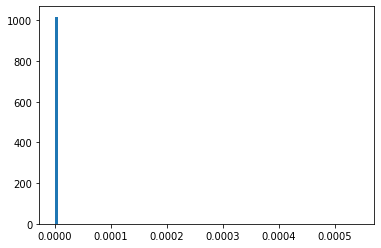

In [28]:
plt.hist(loss, bins = 100)
plt.show()

In [27]:
#plt.hist(bloss, bins = 100)
#plt.show()

In [34]:
#predictions = model.predict(x[1024:])
#binary_predictions = binarize(predictions)

In [44]:
#plt.imshow(predictions[-20:])
#plt.show()

In [47]:
#plt.imshow(binary_predictions[-20:])
#plt.show()

In [43]:
#plt.imshow(y[-20:])
#plt.show()

## Evolution test


In [33]:
def ca_ml(initial_state, generations):
    initial_state = initial_state
    
    grid = np.zeros([generations, len(initial_state)])
    grid[0] = initial_state
    
    for i in range(generations-1):
        aux = [[0]]
        aux[0][0] = grid[i]
        grid[i+1] = binarize(model.predict(aux))[0]
    
    return grid

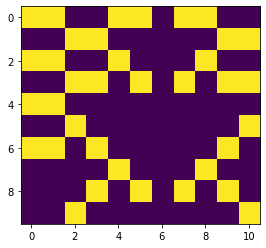

In [34]:
plt.imshow((ca(18, x_test[0], 10)))
plt.show()

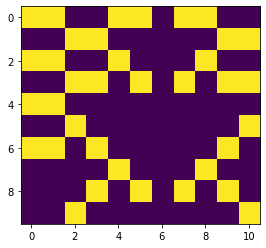

In [35]:
plt.imshow(ca_ml(x_test[0], 10))
plt.show()